In [1]:
%matplotlib inline

import json
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [28]:
pe13 = requests.get('http://172.31.4.40:16000/metrics').json()
pe13.keys()

[u'gauges', u'histograms', u'version', u'meters', u'timers', u'counters']

In [27]:
pe12 = requests.get('http://172.31.6.14:16000/metrics').json()
pe12.keys()

[u'gauges', u'histograms', u'version', u'meters', u'timers', u'counters']

In [29]:
with open('data/pe13.json', 'w') as f:
    json.dump(pe13, f)
with open('data/pe13.json') as f:
    pe13 = json.load(f)

    
with open('data/pe12.json', 'w') as f:
    json.dump(pe12, f)
with open('data/pe12.json') as f:
    pe12 = json.load(f)

In [30]:
def collect(metrics, version):
    for command, timer in metrics['timers'].items():
        if command.startswith('com.adatao.pa.rest.CommandServlet'):
            record = {
                'version': version,
                'command': command.replace('com.adatao.pa.rest.CommandServlet.', '', 1)
            }
            for key in ('count', 'min', 'max', 'mean', 'p50', 'p95', 'stddev'):
                record[key] = timer[key]
            yield record
        
timers = list(collect(pe12, '1.4.12')) + list(collect(pe13, '1.4.13'))
print len(timers)
timers[0]

36


{'command': u'fetchrows',
 'count': 66,
 'max': 0.37001852900000004,
 'mean': 0.1634521763403673,
 'min': 0.031623363,
 'p50': 0.154897847,
 'p95': 0.205432319,
 'stddev': 0.01983547360671087,
 'version': '1.4.12'}

In [31]:
df = pd.DataFrame(timers)
df.head()

,command,count,max,mean,min,p50,p95,stddev,version
0,fetchrows,66,0.370019,0.163452,0.031623,0.154898,0.205432,0.019835,1.4.12
1,nrow,70,0.360513,0.086524,0.044849,0.048036,0.205373,0.064416,1.4.12
2,geturi,172,0.025470,0.008123,0.004899,0.007743,0.014990,0.002188,1.4.12
3,xtabs,32,2.373964,0.237858,0.197218,0.234387,0.309353,0.024840,1.4.12
4,sql2liststring,148,2.387195,0.864552,0.047396,0.855144,1.071374,0.125467,1.4.12


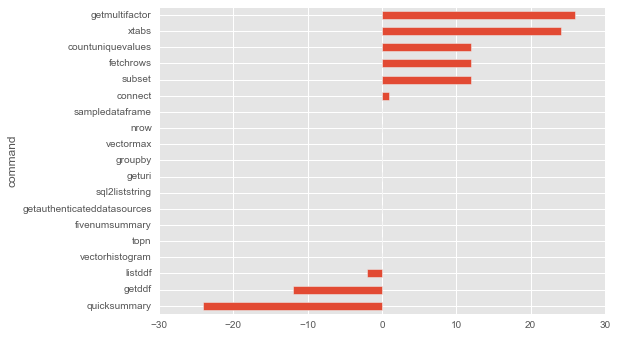

In [32]:
pe12_data = df[df.version == '1.4.12'].set_index('command')
pe13_data = df[df.version == '1.4.13'].set_index('command')

# difference in no. calls between 1.4.12 and 1.4.13
count_diff = pe13_data['count'].subtract(pe12_data['count'], fill_value=0)
count_diff.sort_values().plot.barh()

In [ ]:
# difference in no. calls between 1.4.12 and 1.4.13
count_compare = pd.concat([pe12_data['count'], pe13_data['count']], axis=1)
count_compare.columns = ['1.4.12', '1.4.13']

# difference in number of calls per 
plot = mean_compare.sort_values('1.4.13').plot.barh(figsize=(12,10))

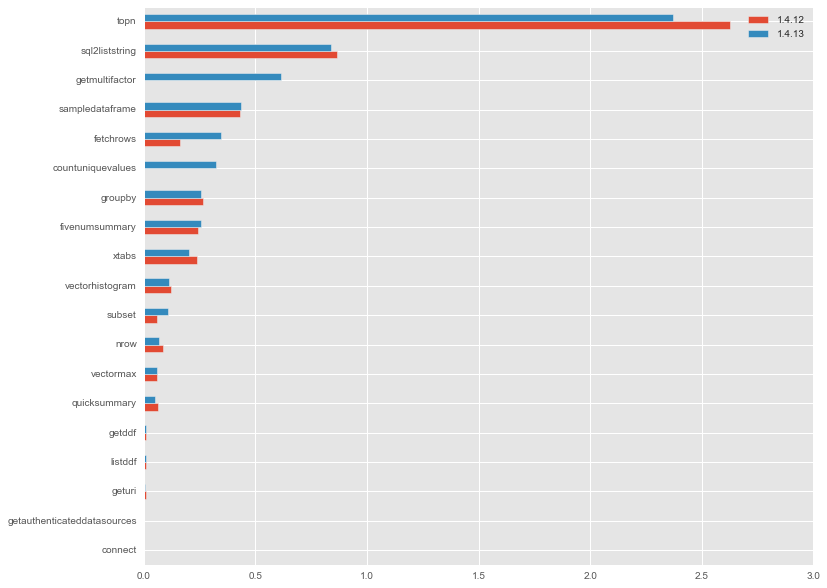

In [39]:
mean_compare = pd.concat([pe12_data['mean'], pe13_data['mean']], axis=1)
mean_compare.columns = ['1.4.12', '1.4.13']

# difference in number of calls per 
plot = mean_compare.sort_values('1.4.13').plot.barh(figsize=(12,10))

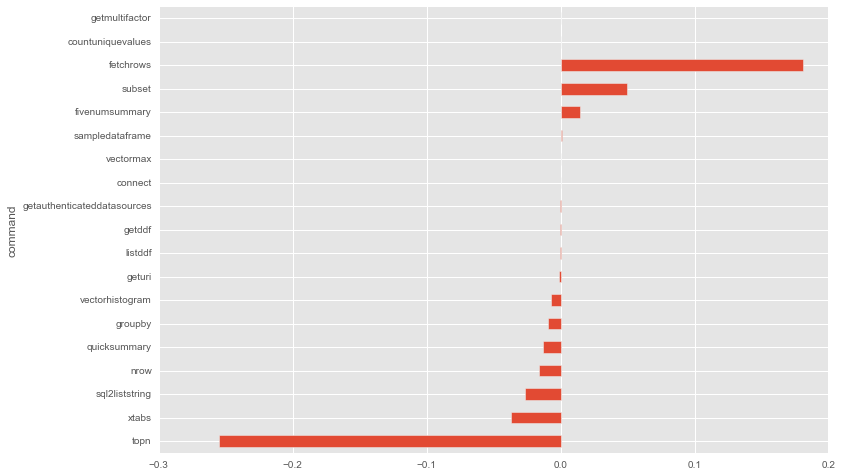

In [41]:
mean_diff = pe13_data['mean'] - pe12_data['mean']

plt.figure(figsize=(12, 8))
mean_diff.sort_values().plot.barh()

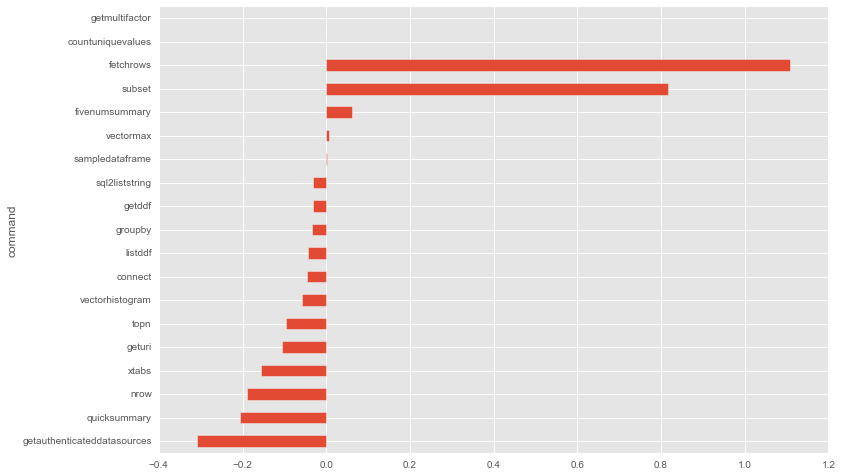

In [42]:
mean_diff_pct = (pe13_data['mean'] - pe12_data['mean']) / pe12_data['mean']

plt.figure(figsize=(12, 8))
mean_diff_pct.sort_values().plot.barh()